# 교차검증과 그리드 서치

In [18]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

In [19]:
from sklearn.model_selection import train_test_split

x = wine.drop(['color'], axis=1)
y = wine['color']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

x_train.shape, x_test.shape

((5197, 12), (1300, 12))

In [20]:
sub_train, val_train, sub_target, val_target = train_test_split(x_train, y_train,
                                                                test_size=0.2,
                                                                random_state=42)

sub_train.shape, val_train.shape

((4157, 12), (1040, 12))

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=13)
dt.fit(sub_train, sub_target)

pred_tr = dt.predict(sub_train)
pred_val = dt.predict(val_train)

print("Train Acc : ", dt.score(sub_train, sub_target))
print("Val Acc : ", dt.score(val_train, val_target))

Train Acc :  0.9995188838104402
Val Acc :  0.9865384615384616


[Text(0.43067748091603053, 0.9736842105263158, 'x[6] <= 70.5\ngini = 0.375\nsamples = 4157\nvalue = [3117, 1040]'),
 Text(0.14249363867684478, 0.9210526315789473, 'x[4] <= 0.046\ngini = 0.212\nsamples = 961\nvalue = [116, 845]'),
 Text(0.08142493638676845, 0.868421052631579, 'x[9] <= 0.555\ngini = 0.174\nsamples = 114\nvalue = [103, 11]'),
 Text(0.03256997455470738, 0.8157894736842105, 'x[1] <= 0.662\ngini = 0.022\nsamples = 88\nvalue = [87, 1]'),
 Text(0.01628498727735369, 0.7631578947368421, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.04885496183206107, 0.7631578947368421, 'x[4] <= 0.041\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.03256997455470738, 0.7105263157894737, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06513994910941476, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13027989821882952, 0.8157894736842105, 'x[1] <= 0.325\ngini = 0.473\nsamples = 26\nvalue = [16, 10]'),
 Text(0.11399491094147583, 0.7631578947368421, 'x[6] <

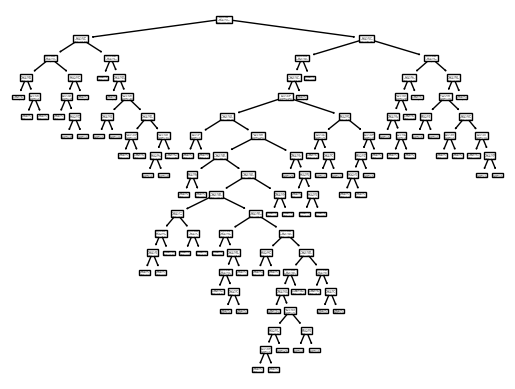

In [13]:
from sklearn.tree import plot_tree

plot_tree(dt)

In [41]:
import numpy as np
from sklearn.model_selection import KFold

x = np.array([
    [1, 2], [3, 4], [1, 2], [3, 4]
])

y = np.array([1, 2, 3, 4])

In [42]:
kf = KFold(n_splits=2)

print(kf)
print(kf.get_n_splits(x))

KFold(n_splits=2, random_state=None, shuffle=False)
2


In [44]:
for train_idx, val_idx in kf.split(x) :
    print('훈련 세트 : ', train_idx)
    print('검증 세트 : ', val_idx)

훈련 세트 :  [2 3]
검증 세트 :  [0 1]
훈련 세트 :  [0 1]
검증 세트 :  [2 3]


In [46]:
x[train_idx], x[val_idx]

(array([[1, 2],
        [3, 4]]),
 array([[1, 2],
        [3, 4]]))

In [47]:
for train_idx, val_idx in kf.split(x) :
    print('--- index')
    print(train_idx, val_idx)
    print('--- train data')
    print(x[train_idx])
    print('--- validation data')
    print(x[val_idx])

--- index
[2 3] [0 1]
--- train data
[[1 2]
 [3 4]]
--- validation data
[[1 2]
 [3 4]]
--- index
[0 1] [2 3]
--- train data
[[1 2]
 [3 4]]
--- validation data
[[1 2]
 [3 4]]


In [49]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [51]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

6497

In [52]:
for train_idx, test_idx in kfold.split(x) :
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [53]:
cv_accuracy = []

for train_idx, test_idx in kfold.split(x) :
    # 데이터셋 x에서 훈련 세트와 검증 세트 분류
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    # 각 훈련 세트와 검증 세트의 index에 해당하는 라벨 y 선택
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 분할된 훈련 세트로 훈련 
    wine_tree_cv.fit(x_train, y_train)
    # 검증 세트로 예측 진행
    pred = wine_tree_cv.predict(x_test)
    # 모델 예측에 대한 정확도를 리스트에 append
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [54]:
np.mean(cv_accuracy)

0.709578255462782

In [55]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accuracy = []

for train_idx, test_idx in skfold.split(x, y) :
    # 데이터셋 x에서 훈련 세트와 검증 세트 분류
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    # 각 훈련 세트와 검증 세트의 index에 해당하는 라벨 y 선택
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 분할된 훈련 세트로 훈련 
    wine_tree_cv.fit(x_train, y_train)
    # 검증 세트로 예측 진행
    pred = wine_tree_cv.predict(x_test)
    # 모델 예측에 대한 정확도를 리스트에 append
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy

[0.5523076923076923,
 0.6884615384615385,
 0.7143956889915319,
 0.7321016166281755,
 0.7567359507313318]

In [56]:
np.mean(cv_accuracy)

0.6888004974240539

In [59]:
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, x, y, scoring=None, cv=skfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

In [60]:
from sklearn.model_selection import cross_validate

cross_validate(wine_tree_cv, x, y, cv=skfold, return_train_score = True)

{'fit_time': array([0.01173019, 0.01137209, 0.01883912, 0.0089941 , 0.00830722]),
 'score_time': array([0.00195003, 0.04125524, 0.00191307, 0.0014708 , 0.00123811]),
 'test_score': array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595]),
 'train_score': array([0.74773908, 0.74696941, 0.74317045, 0.73509042, 0.73258946])}

In [61]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2, 4, 7, 18]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(x, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 18]})

In [63]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00987101, 0.015272  , 0.02550426, 0.04464474]),
    'mean_score_time': array([0.00175257, 0.00137353, 0.00159602, 0.00182981]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.60491917]),
    'param_max_depth': masked_array(data=[2, 4, 7, 18],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 18}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.47384615]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.57615385]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.6073903 ]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.67359507]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.6936104

In [64]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [65]:
gridsearch.best_params_

{'max_depth': 2}

In [66]:
gridsearch.best_score_

0.6888004974240539

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

dt = gridsearch.best_estimator_

y_pred_test = dt.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.7407692307692307

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# pipeline에 사용될 estimaotrs
estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=13))]

# pipeline 구축
pipe = Pipeline(estimators)

# pipeline의 clf작업에서 탐색할 max_depth 하이퍼파라미터 리스트 지정
param_grid = [{'clf__max_depth' : [2, 4, 7, 18]}]

# 그리드 서치 수행
gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
gridsearch.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 18]}])

In [72]:
gridsearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [75]:
import pandas as pd

score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.653408,0.086993
3,{'clf__max_depth': 18},4,0.607536,0.077626


In [76]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print("Accuracy : ", accuracy_score(y_test, y_pred_test))
print("Recall : ", recall_score(y_test, y_pred_test))
print("Precision : ", precision_score(y_test, y_pred_test))
print("AUC Score : ", roc_auc_score(y_test, y_pred_test))
print("F1 Score : ", f1_score(y_test, y_pred_test))

Accuracy :  0.7161538461538461
Recall :  0.7314702308626975
Precision :  0.8026666666666666
AUC Score :  0.7105988470875331
F1 Score :  0.7654164017800381


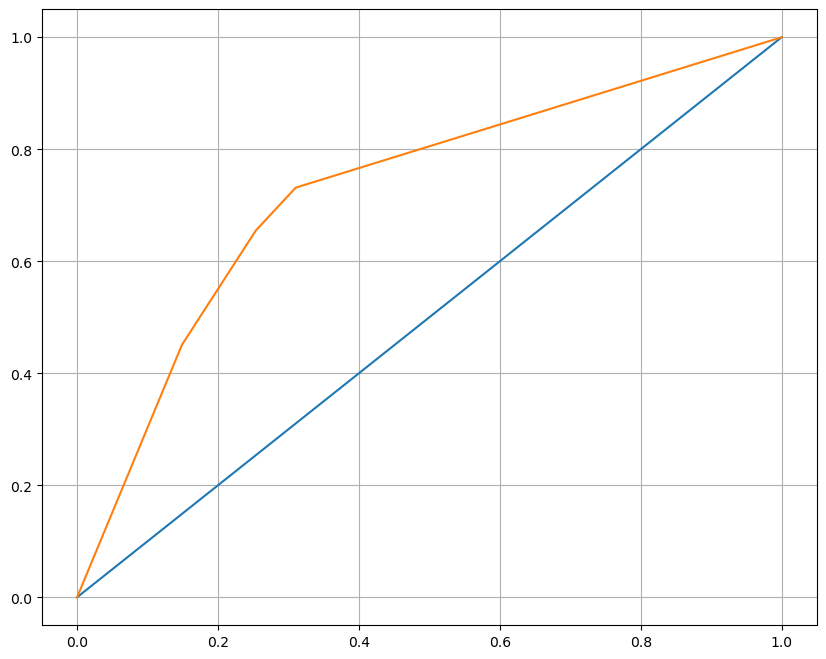

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

# wine_tree 중 positive라고 예측한 확률
pred_proba = wine_tree.predict_proba(x_test)[:, 1]
# 실제 target data(y_test)와 positive라고 예측한 확률(pred_progba) 전달
fpr, tpr, threshold = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()